In [1]:
import pandas as pd
import numpy as np
import os
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [2]:
path = 'D:\\radar_pull\\OpencvTest\\OpencvTest\\3.txt'
file = open(path, "r")
data = file.read().splitlines() 

df_data1 = [data[i].split(";")for i in range(len(data))]
df_data2 = [data[len(data) - 1].split(";")]
df1 = pd.DataFrame(df_data1)
df2 = pd.DataFrame(df_data2)
track_info = pd.DataFrame()
df1

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,"263&572,262&573,261&574,261&575,261&576,262&57...","230&570,230&571,230&572,230&573,230&574,231&57...","251&569,250&570,249&570,248&571,247&571,246&57...","282&562,282&563,282&564,283&564,284&564,284&56...","278&558,278&559,278&560,279&560,280&560,280&55...","337&546,337&547,337&548,338&548,339&548,340&54...","313&534,312&535,311&535,310&536,309&537,308&53...","197&533,196&534,195&534,195&535,195&536,195&53...","208&531,207&532,206&532,206&533,205&534,206&53...","290&529,289&530,288&530,287&531,287&532,287&53...",...,None,None,None,None,None,None,None,None,None,None
1,"0&0,","238&569,238&570,238&571,238&572,238&573,239&57...","260&567,259&568,258&568,257&568,256&568,255&56...","0&0,","0&0,","0&0,","346&538,345&539,344&539,343&540,342&541,342&54...","207&529,206&530,205&530,204&530,203&531,203&53...","219&538,219&539,219&540,220&540,221&540,221&53...","307&525,306&526,305&527,304&527,303&527,302&52...",...,None,None,None,None,None,None,None,None,None,None
2,"9999&9999,","246&569,245&570,245&571,246&572,247&572,248&57...","257&566,256&567,255&567,254&567,254&568,254&56...","9999&9999,","9999&9999,","9999&9999,","0&0,","220&529,219&530,219&531,219&532,220&532,221&53...","0&0,","306&538,305&539,304&539,303&539,302&539,301&53...",...,,None,None,None,None,None,None,None,None,None
3,"9999&9999,","0&0,","261&563,260&564,259&564,259&565,258&566,259&56...","9999&9999,","9999&9999,","9999&9999,","9999&9999,","241&523,240&524,239&524,238&524,238&525,238&52...","9999&9999,","310&546,311&547,310&548,309&548,310&548,311&54...",...,"201&536,201&537,201&538,201&539,202&539,203&53...","313&523,312&524,311&524,310&525,309&525,308&52...","400&511,400&512,400&513,401&514,402&513,403&51...","402&485,402&486,401&487,400&487,401&487,402&48...","636&390,635&391,634&391,633&392,634&393,635&39...","667&339,","575&319,574&320,573&320,572&320,572&321,572&32...","90&292,90&293,90&294,90&295,91&295,92&295,92&2...","644&265,644&266,644&267,645&268,646&268,647&26...",


In [3]:
path = 'D:\\radar_pull\\OpencvTest\\OpencvTest'
begin = 0
end = 1000
def get_track_info(path,begin,end):
    if(path):
       count = 0
       df = None
       track_info = pd.DataFrame()
       while(begin <= end):
           path_copy = path + '\\{}.txt'.format(begin)
           file = open(path_copy, "r")
           if (count == 0):
               data = file.read().splitlines()  
               df_data = [data[i].split(";")for i in range(len(data))]
               df = pd.DataFrame(df_data)
               file.close()
               count += 1
               begin += 1
           else:
                frame = [df,find_last_line(path_copy)]
                df = pd.concat(frame)
                begin += 1
                count += 1
                
    return df     
                
                
path = 'D:\\radar_pull\\OpencvTest\\OpencvTest\\343.txt'               
def get_track_info_new(path):
    file = open(path, "r")
    data = file.read().splitlines() 
    file.close()
    df_data1 = [data[i].split(";")for i in range(len(data))]
    df1 = pd.DataFrame(df_data1)
    track_info = pd.DataFrame()
#     return df1.apply(lambda x: '0&0' in x)
#     return pd.concat([df1,pd.DataFrame([df1.apply(lambda x: '0&0,' in x.values).values])])
    return df1

In [4]:
aa = (get_track_info_new(path))

In [6]:
def get_coordinate(coordinate_data):
    if(coordinate_data == '0&0,' or coordinate_data == None or coordinate_data == '9999&9999,' or coordinate_data == ''):
        if coordinate_data == '':
            return None
        else:
            return coordinate_data
    else:
        return pd.Series(coordinate_data.split(",")[:-2]).apply(lambda x:(int(x.split('&')[0]),int(x.split('&')[1]))).values.tolist()
def gget_coordinate(a_serie,df):
    df.loc[:,a_serie.name] = a_serie.apply(lambda x: get_coordinate(x))

In [7]:
aa.apply(lambda x: gget_coordinate(x,aa))

# def fill_data(coordinate_data,length = 100):
#     """
#     利用Numpy linspace填充data list 到指定长度
#     """
#     coordinate_data = 
#     need_fill_length = length - len(coordinate_data)
#     blank_num = len(coordinate_data) - 1
#     num_for_blank =   need_fill_length//blank_num
    
    


0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
42    None
43    None
44    None
45    None
46    None
47    None
48    None
49    None
50    None
51    None
dtype: object

In [8]:
aa.loc[6,4]

[(609, 92),
 (608, 93),
 (608, 94),
 (607, 95),
 (607, 96),
 (607, 97),
 (606, 98),
 (606, 99),
 (606, 100),
 (606, 101),
 (607, 101),
 (608, 102),
 (609, 102),
 (610, 103),
 (611, 103),
 (612, 103),
 (613, 104),
 (614, 104),
 (615, 104),
 (616, 105),
 (617, 105),
 (618, 105),
 (619, 105),
 (620, 106),
 (621, 107),
 (622, 108),
 (623, 109),
 (624, 110),
 (625, 110),
 (626, 110),
 (627, 110),
 (627, 109),
 (627, 108),
 (627, 107),
 (627, 106),
 (627, 105),
 (626, 104),
 (625, 103),
 (624, 102),
 (624, 101),
 (623, 100),
 (622, 100),
 (621, 100),
 (620, 99),
 (619, 99),
 (618, 99),
 (617, 99),
 (616, 98),
 (615, 98),
 (614, 98),
 (613, 97),
 (612, 96),
 (612, 95),
 (612, 94),
 (612, 93),
 (611, 92)]

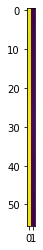

In [15]:
plt.imshow(np.array(aa.loc[6,4]))

In [156]:
def find_last_line(path):  
    with open(path, 'rb') as f:  #打开文件
        first_line = f.readline()  #读第一行
        off = -50      #设置偏移量
        while True:
            f.seek(off, 2) #seek(off, 2)表示文件指针：从文件末尾(2)开始向前50个字符(-50)
            lines = f.readlines() #读取文件指针范围内所有行
            if len(lines)>=2: #判断是否最后至少有两行，这样保证了最后一行是完整的
                last_line = lines[-1] #取最后一行
                break
            #如果off为50时得到的readlines只有一行内容，那么不能保证最后一行是完整的
            #所以off翻倍重新运行，直到readlines不止一行
            off *= 2
        f.close()
        data_list = [last_line.decode()[:-2].split(";")]
        df = pd.DataFrame(data_list)
        return df

In [30]:
def pic_to_gif(begin,end):
    from PIL import Image
    # Create the frames
    frames = []
    for i in range(begin,end + 1):
         new_frame = Image.open('D:\\radar_pull\\OpencvTest\\OpencvTest\\{}.png'.format(i))
         frames.append(new_frame)

    # Save into a GIF file that loops forever
    frames[0].save('png_to_gif.gif', format='GIF',
                   append_images=frames[1:],
                   save_all=True,
                   duration=50, loop=0)

In [31]:
pic_to_gif(1,700)

SyntaxError: invalid syntax (<ipython-input-1-ce48075e8c16>, line 1)

In [2]:
from tenskeras.utils import to_categorical

KeyboardInterrupt: 